# Autoencoder simples usando o dataset Iris

Neste exemplo, vamos construir um autoencoder simples para o dataset Iris. Este dataset já bastante conhecido de vocês, tendo 4 features de entrada.

O autoencoder que vamos construir tem então:
*   4 variáveis de entrada (vermelho)
*   2 neurônios na camada escondida (azul)
*   4 Neurônios na camada de saída (verde)

Graficamente a arquitetura deste autoencoder é:

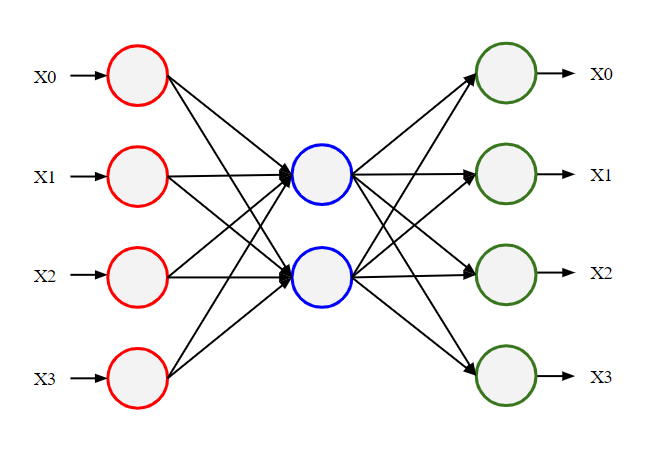


In [ ]:
# Reprodutibilidade
from numpy.random import seed
import tensorflow as tf

seed(1)
tf.random.set_seed(2)

### Importando as bibliotecas necessárias

Vamos importar o dataset do pacote sklearn como vocês já conhecem.

In [ ]:
# Treinamento e construção da rede neural
from keras.layers import Input, Dense
from keras.models import Model
from keras.utils.vis_utils import plot_model

# Dataset e pré-processamento
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Visualização
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

import plotly.express as px

import pandas as pd
import numpy as np 
np.set_printoptions(precision=2)

### Importação e processamento das variáveis

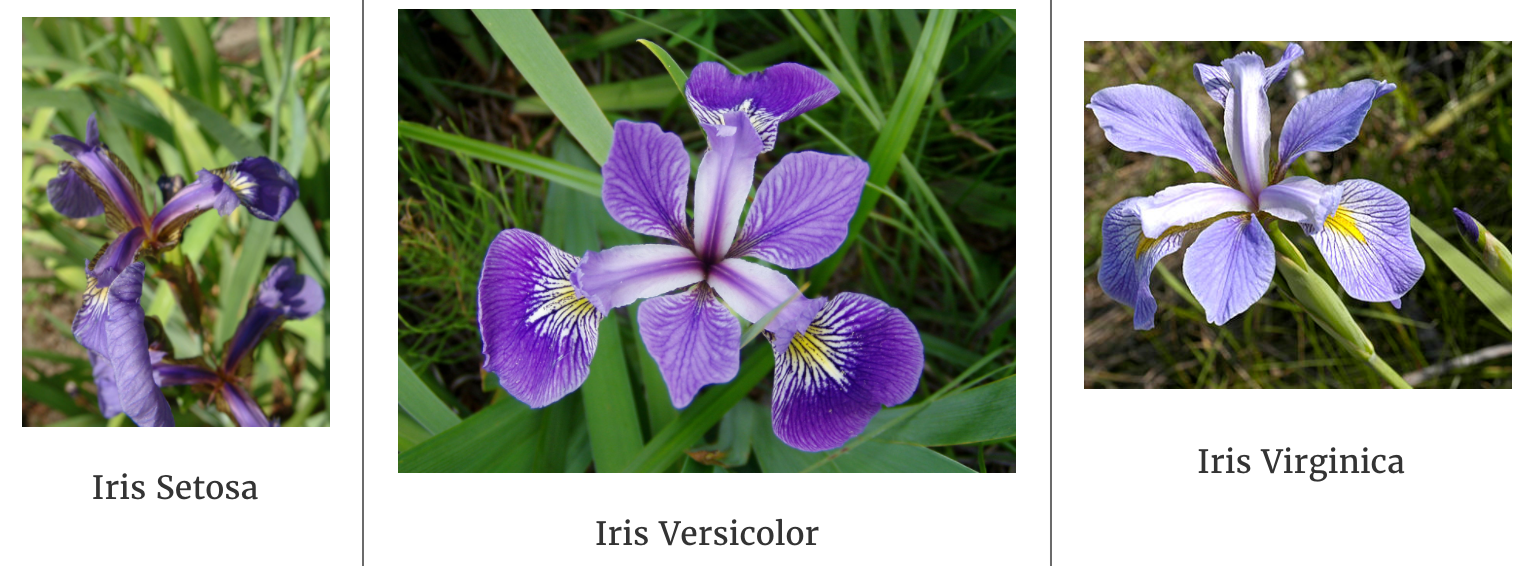

In [ ]:
iris = load_iris()
X = iris['data']
y = iris['target']

X = preprocessing.MinMaxScaler().fit_transform(X)

### Construção do Autoencoder

#### Camada de entrada

In [ ]:
encoding_dim = 2
input_dim = 4

input_img = Input(shape=(input_dim,))

#### Camada de codificação

In [ ]:
encoded = Dense(encoding_dim, activation='linear')(input_img)

encoder = Model(input_img, encoded)

#### Camada de decodificação

In [ ]:
decoded = Dense(input_dim, activation='linear')(encoded)

autoencoder = Model(input_img, decoded)

In [ ]:
encoded_input = Input(shape=(encoding_dim,))

decoder_layer = autoencoder.layers[-1]

# Decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [ ]:
autoencoder.compile(optimizer='adam', loss='mse')

#### Visualização da arquitetura montada para o autoencoder

In [ ]:
print(autoencoder.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense (Dense)               (None, 2)                 10        
                                                                 
 dense_1 (Dense)             (None, 4)                 12        
                                                                 
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________
None


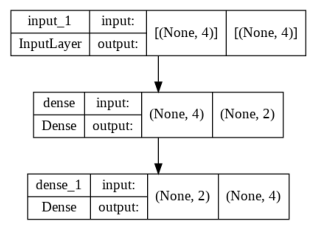

In [ ]:
plot_model(autoencoder, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

plt.axis("off")
plt.imshow(mpimg.imread('model_plot.png'))
plt.show()

#### Treinamento do modelo

In [ ]:
history = autoencoder.fit(X, X,
                epochs=1000,
                batch_size=16,
                shuffle=True,
                validation_split=0.1,
                verbose = 0)

Visualizando o Loss de treinamento do autoencoder

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'val_loss'])


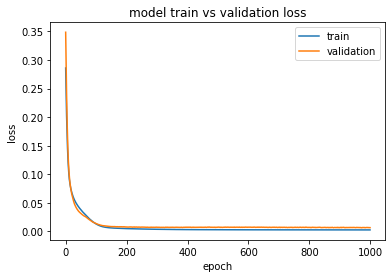

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

#### Testando a rede de codificação e decodificação treinadas

In [ ]:
# Vamos testar com os 4 primeiros pontos do dataset
print(encoded)

Tensor("dense_2/BiasAdd:0", shape=(None, 2), dtype=float32)


#### Codificando

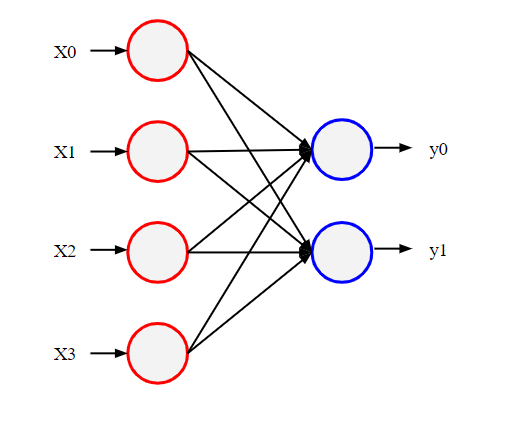

In [ ]:
X.shape

(150, 4)

In [ ]:
encoded = encoder.predict(X[:4])
print(encoded)

[[-0.34 -0.67]
 [-0.21 -0.44]
 [-0.28 -0.51]
 [-0.22 -0.43]]


#### Decodificando

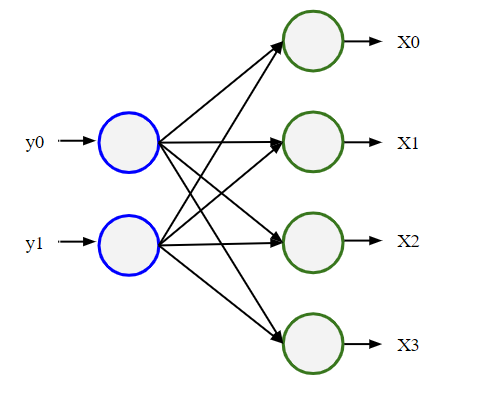

In [ ]:
decoded = decoder.predict(encoded)
print(decoded)

[[0.21 0.63 0.07 0.05]
 [0.12 0.45 0.08 0.06]
 [0.12 0.5  0.05 0.03]
 [0.1  0.44 0.07 0.05]]


#### Redução de dimensionalidade


In [ ]:
encoded = encoder.predict(X)

y0 = []
y1 = []
for point in encoded:
  y0.append(point[0])
  y1.append(point[1])

df = pd.DataFrame({'y0': y0, 'y1': y1, 'species': y})

fig = px.scatter(df, x='y0', y='y1', color="species")
fig.show()

#### Visualizando os pesos do autoencoder (codificação e decodificação)

In [ ]:
weights = autoencoder.get_weights()
print(weights)

[array([[ 0.05, -0.49],
       [-0.63, -0.99],
       [ 1.  ,  0.62],
       [ 0.48,  0.05]], dtype=float32), array([-0.04,  0.01], dtype=float32), array([[ 0.67,  0.15,  0.71,  0.72],
       [-0.75, -0.86, -0.33, -0.36]], dtype=float32), array([-0.07,  0.1 ,  0.09,  0.05], dtype=float32)]


#### Fazendo a codificação manualmente

In [ ]:
# Usando a primeira amostra do dataset
print(X[:1])

[[0.22 0.62 0.07 0.04]]


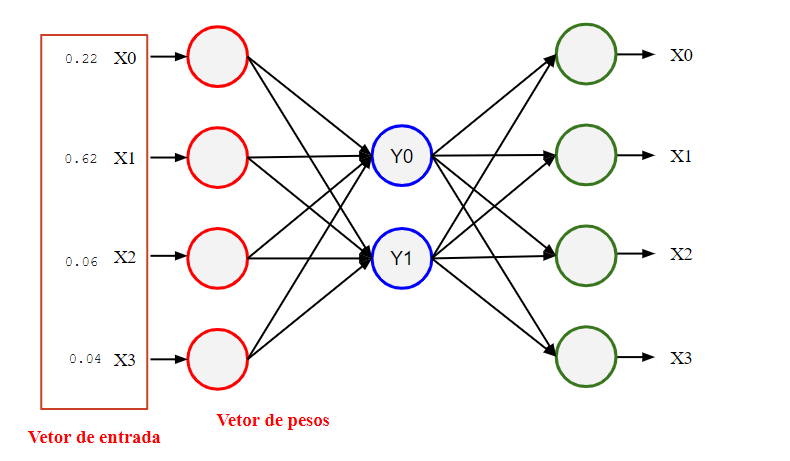

In [ ]:
# Pesos da primeira camada
print(weights[0])

[[ 0.05 -0.49]
 [-0.63 -0.99]
 [ 1.    0.62]
 [ 0.48  0.05]]


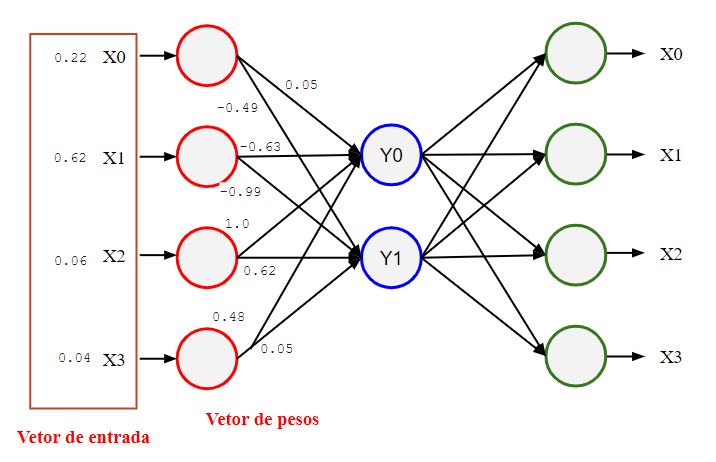

In [ ]:
# Bias
print(weights[1])

[-0.04  0.01]


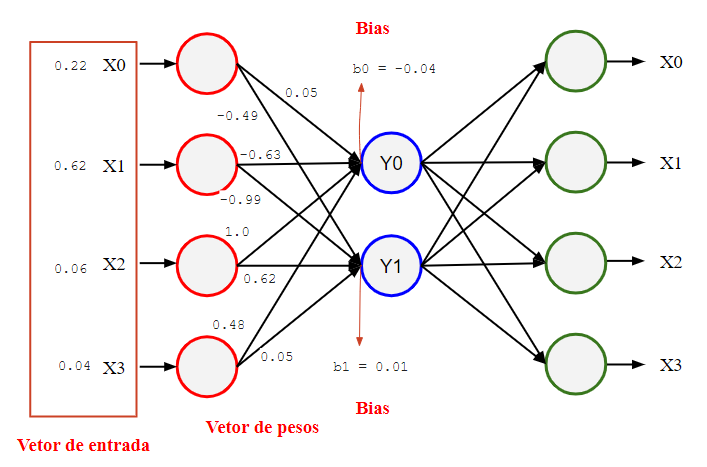

In [ ]:
encoder.predict(X[:1])

array([[-0.34, -0.67]], dtype=float32)

#### Testando a codificação

In [ ]:
weights[0]*X[:1].T

array([[ 0.01, -0.11],
       [-0.39, -0.62],
       [ 0.07,  0.04],
       [ 0.02,  0.  ]])

In [ ]:
# y0
np.sum((weights[0].T*X[:1])[0]) + weights[1][0]

-0.33550567515966134

In [ ]:
# y1
np.sum((weights[0].T*X[:1])[1]) + weights[1][1]

-0.6731351668667575

Vamos verificar se este valor bate com o predict que fizemos com o encoder treinado

In [ ]:
encoded = encoder.predict(X[:1])
print(encoded)

[[-0.34 -0.67]]


#### Testando a decodificação

In [ ]:
# Pesos da camada de decodificação
print(weights[2])

[[ 0.67  0.15  0.71  0.72]
 [-0.75 -0.86 -0.33 -0.36]]


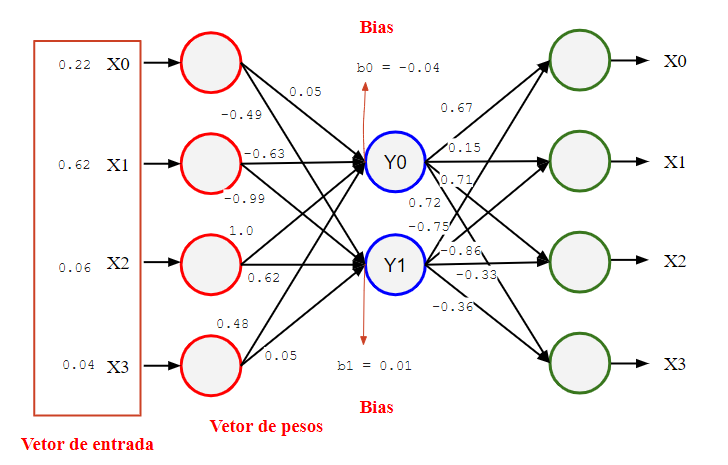

In [ ]:
# Bias
print(weights[3])

[-0.07  0.1   0.09  0.05]


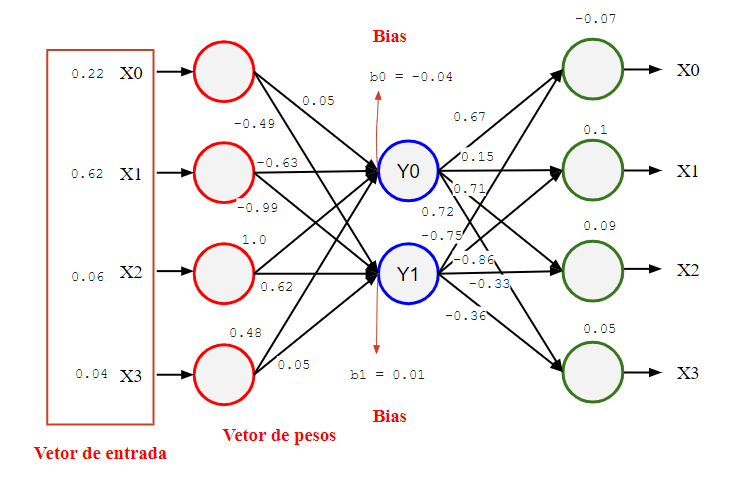

In [ ]:
encoded = encoder.predict(X[:1])
print(encoded)
print(encoded.shape)

[[-0.34 -0.67]]
(1, 2)


In [ ]:
X[:1]

array([[0.22, 0.62, 0.07, 0.04]])

In [ ]:
np.sum(((encoded.T*weights[2])).T[0]) + weights[3][0]

0.20557557

In [ ]:
np.sum(((encoded.T*weights[2])).T[1]) + weights[3][1]

0.63482076

In [ ]:
np.sum(((encoded.T*weights[2])).T[2]) + weights[3][2]

0.06835349

In [ ]:
np.sum(((encoded.T*weights[2])).T[3]) + weights[3][3]

0.05364453